In [1]:
#import statement
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from numpy.linalg import eig


In [2]:
#two dimention data
data = np.array([[3,4],[2,8],[6,9],[10,12]])

In [3]:
print(data)

[[ 3  4]
 [ 2  8]
 [ 6  9]
 [10 12]]


In [4]:
#create dataframe
df = pd.DataFrame(data,columns=['ml','dl'])

In [5]:
df

,ml,dl
0,3,4
1,2,8
2,6,9
3,10,12


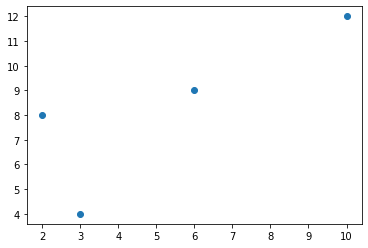

In [6]:
plt.scatter(df['ml'],df['dl'])

### PCA -steps
1. standarization of the data(Zero centric data)(scaled data)
2. cov matrix
3. eigen value and eigen vector
4. find principle compenent

In [7]:
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [8]:
data.T# mean centric data

array([[ 3,  2,  6, 10],
       [ 4,  8,  9, 12]])

In [9]:
mean_by_col = np.mean(data.T, axis = 1)
print(mean_by_col)

[5.25 8.25]


In [10]:
#(if we standerizaion of data so (data_point - mean)/stander deviation
scal_data= data-mean_by_col#scaled data

In [11]:
# step 2 cov matrix beacaue we want relation betweent variable

In [12]:
cov_mat = np.cov(scal_data.T)

In [13]:
#step -3 eigen vlue and eigen vector
eig_value, eig_vector= np.linalg.eig(cov_mat)

In [14]:
eig_value

array([21.55203266,  2.28130068])

In [15]:
eig_vector

array([[ 0.74289445, -0.66940857],
       [ 0.66940857,  0.74289445]])

In [16]:
scal_data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [17]:
# perfom transpos oprestion 

In [18]:
# we are getting two principle componet
eig_vector.T.dot(scal_data.T).T

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

### using sklearn

In [19]:
from sklearn.decomposition import PCA
pca = PCA()

In [20]:
pca.fit_transform(scal_data)

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

In [21]:
pd.DataFrame(data= pca.fit_transform(scal_data), columns=['pc1','pc2'])

,pc1,pc2
0,-4.516499,-1.651132
1,-2.581759,1.989854
2,1.059227,0.055114
3,6.039031,-0.393837


In [22]:
#invers transformation 
pca.inverse_transform(pca.fit_transform(scal_data))

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [23]:
pca.explained_variance_ratio_

array([0.90428109, 0.09571891])

In [24]:
# model for machine learning there is two col i have to choose one col pc1 or pc2
# we select pc1 beacouse pc1 represeting more variation

In [25]:
glass_data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv', names=['Rl','Na','Mg','Al','Si','K','Ca','Ba','Fe','class'])

In [26]:
glass_data.head()

,Rl,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [27]:
new_data = glass_data.drop(labels=['class'], axis=1)

In [28]:
new_data.head()

,Rl,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [29]:
new_data.isnull().sum()

Rl    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [30]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rl,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


In [31]:
#pca 
# step-1 standarization of the data

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
scaler_data=scaler.fit_transform(new_data)

In [34]:
scaler_df = pd.DataFrame(data = scaler_data,columns=new_data.columns)

In [35]:
scaler_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rl,214.0,-2.877449e-14,1.002345,-2.381516,-0.608273,-0.226229,0.261433,5.137232
Na,214.0,2.179980e-15,1.002345,-3.286943,-0.614158,-0.132382,0.512033,4.875637
Mg,214.0,-2.801497e-16,1.002345,-1.865511,-0.395774,0.552779,0.636168,1.254639
Al,214.0,-3.434428e-16,1.002345,-2.318616,-0.511756,-0.170460,0.371598,4.125851
Si,214.0,9.966067e-16,1.002345,-3.676472,-0.480029,0.179965,0.564962,3.570524
K,214.0,7.470660e-17,1.002345,-0.763919,-0.575650,0.089053,0.173582,8.780145
Ca,214.0,-3.137418e-16,1.002345,-2.484084,-0.504966,-0.251413,0.151806,5.094318
Ba,214.0,-1.763906e-16,1.002345,-0.352877,-0.352877,-0.352877,-0.352877,5.997210
Fe,214.0,-6.121791e-17,1.002345,-0.586451,-0.586451,-0.586451,0.442242,4.659881


In [36]:
from sklearn.decomposition import PCA
pca = PCA()

In [37]:
pca.fit_transform(scaler_df)

array([[ 1.15113957, -0.52948764, -0.37209565, ..., -0.39560005,
        -0.19716008,  0.01634649],
       [-0.57413717, -0.75978777, -0.55670817, ..., -0.02415793,
        -0.28421356, -0.0107898 ],
       [-0.94015972, -0.92983597, -0.55490744, ..., -0.36751757,
        -0.09594067,  0.02164019],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, ...,  0.67412231,
        -0.89170969,  0.04628358],
       [-2.36974768,  2.7568728 , -1.23470076, ...,  0.67889932,
         0.07446015, -0.02730068],
       [-2.26264885,  3.02859155, -0.89084474, ...,  0.46246107,
         0.0633149 , -0.01944978]])

In [38]:
scaler_df.shape

(214, 9)

In [39]:
pc_df = pd.DataFrame(data = pca.fit_transform(scaler_df))

In [40]:
pc_df.shape

(214, 9)

In [41]:
var = pca.explained_variance_ratio_

In [42]:
type(var)

numpy.ndarray

In [43]:
max(var)*100 # this is represent the 27.90% variance

27.901819179456467

In [44]:
min(var)

0.00017875753590172633

In [45]:
sum(var)

0.9999999999999998

In [46]:
1-sum(var)

2.220446049250313e-16

#### as we can see some where we are lossing data in pca when ever we transfoming 

In [49]:
np.sort(var)

array([1.78757536e-04, 7.09477197e-03, 4.09953826e-02, 5.86261325e-02,
       1.01555805e-01, 1.28651383e-01, 1.56093777e-01, 2.27785798e-01,
       2.79018192e-01])

In [52]:
sorted(var,reverse=True)[:6]# for reversal order 

[0.27901819179456466,
 0.22778579831670392,
 0.1560937771094047,
 0.12865138291980244,
 0.10155580523615623,
 0.05862613252208674]

In [56]:
np.sort(var)[::-1]

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [54]:
sum(sorted(var,reverse=True)[:6])

0.9517310878987186

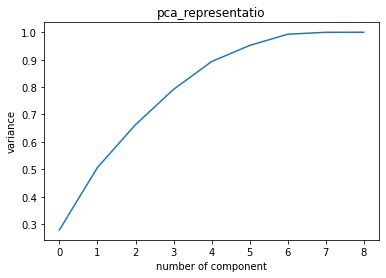

In [47]:
plt.figure()
plt.plot(np.cumsum(var))
plt.xlabel("number of component")
plt.ylabel('variance')
plt.title('pca_representatio')
plt.show()

In [48]:
pc_df.head()

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315
